In [1]:
import pandas as pd

import numpy as np
# from numpy import mean
# from numpy import std
# from numpy import ravel

import seaborn as sns
import matplotlib.pyplot as plt

# import scipy
# import joblib
# import re
# import glob
# import sklearn
# from math import sqrt
# from decimal import Decimal

# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn.model_selection import cross_val_score

# from sklearn.model_selection import GridSearchCV

# from sklearn.metrics import make_scorer
# from sklearn.metrics import mean_squared_error
# # from sklearn.metrics import mean_absolute_percentage_error


# from geopy.exc import GeocoderTimedOut
# from geopy.distance import geodesic
# from geopy.geocoders import Nominatim

# from tqdm import tqdm

# # !pip install CurrencyConverter
# from currency_converter import CurrencyConverter

In [2]:
data = pd.read_csv('../data/_data.csv')

In [3]:
data.head(10)



,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,На улицу и двор,Совмещенный (2),NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",The Book,NaN,3.9,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615
5,5,274837728,3,Квартира,м. Смоленская (5 мин пешком),"Москва, 1-й Смоленский переулок, 21",92.0,3/7,NaN,"470000.0 руб./ За месяц, Залог - 470000 руб., ...",...,NaN,NaN,NaN,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Smolensky De Luxe,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/274837728
6,6,273643908,"5, Оба варианта",Квартира,м. Арбатская (4 мин пешком),"Москва, переулок Романов, 3С1",213.0/140.0/20.0,4/5,наземная,"350000.0 руб./ За месяц, Залог - 350000 руб., ...",...,На улицу и двор,Совмещенный (2),"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/273643908
7,7,274475342,3,Квартира,м. Смоленская (3 мин пешком),"Москва, улица Арбат, 43С3",98.0/63.0/9.0,"2/4, Монолитный",подземная,"250000.0 руб./ За месяц, Залог - 250000 руб., ...",...,Во двор,"Совмещенный (1), Раздельный (1)","Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),Нет,https://www.cian.ru/rent/flat/274475342
8,8,273973191,3,Квартира,м. Смоленская (9 мин пешком),"Москва, Новинский бульвар, 18С1",120.0/95.0/10.0,"5/10, Сталинский",открытая,"130000.0 руб./ За месяц, Залог - 130000 руб., ...",...,На улицу,Совмещенный (1),Можно с животными,"Мебель на кухне, Ванна, Стиральная машина, Кон...",NaN,NaN,3.0,Пасс (1),Нет,https://www.cian.ru/rent/flat/273973191
9,9,272900409,4,Квартира,м. Арбатская (10 мин пешком),"Москва, улица Арбат, 30/3С1",90.0/66.0/10.0,"2/7, Сталинский",открытая,"210000.0 руб./ За месяц, Залог - 210000 руб., ...",...,На улицу и двор,"Совмещенный (1), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Сти...",NaN,NaN,310.0,Пасс (1),Да,https://www.cian.ru/rent/flat/272900409


## Обзор данных по аренде квартир в Москве

#### Цель датасета
Цель датасета - моделирование цен аренды квартир в Москве. Датасет содержит 23,368 записей.

#### Колонки и данные

##### Количество комнат
    Процент пустых данных: 4.45%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 10 (1, 2, 3, 4 и т.д.)
    Частые значения: 2 (9,538), 1 (7,678), 3 (4,358)

##### Тип
    Процент пустых данных: 0%
    Рекомендация: удалить
    Уникальные значения: 1 (Квартира)

##### Метро
    и рассстояние до метро пешком, транспортом
    Процент пустых данных: 5.62%
    Рекомендация: оставить, заполнить пропуски, перевести в районы 2 уровней, выделить расстояние
    Уникальные значения: 218
    

##### Адрес
    Улица, дом
    Процент пустых данных: 0%
    Рекомендация: оставить, зависит от обработки
    Уникальные значения: 23,368
    Частые значения: нет повторяющихся значений

##### Площадь, м2
    Процент пустых данных: 0%. Но есть общая площадь и площадь по помещениям. Последняя часто указана неполностью.
    Рекомендация: оставить
    Уникальные значения: 3,019
    Частые значения: 50 (260), 60 (220), 45 (215)

##### Дом
    Это этаж, этажность, тип дома.
    Процент пустых данных: 0%
    Рекомендация: оставить
    Уникальные значения: 17,452
    Частые значения: нет выраженно частых значений

##### Парковка
    Процент пустых данных: 57.42%
    Рекомендация: удалить из-за большого количества пропусков
    Уникальные значения: 4 (Да, Нет, Подземная, Наземная)
    Частые значения: Нет (3,722), Подземная (3,001), Наземная (2,228)

##### Цена
    Моделируемая переменная
    Процент пустых данных: 0%, но много инфо о залоге, коммуналке итп.
    Рекомендация: оставить
    Уникальные значения: 6,375
    Частые значения: 50,000 (182), 45,000 (176), 40,000 (160)

##### Телефоны
    Процент пустых данных: 0%
    Рекомендация: удалить
    Уникальные значения: 23,368
    Частые значения: нет повторяющихся значений

##### Описание
    Процент пустых данных: 0%
    Рекомендация: удалить: написано человеком, важная инфо есть в "Дополнительно" формализованно.
    Уникальные значения: 23,368
    Частые значения: нет повторяющихся значений

##### Ремонт
    Процент пустых данных: 11.78%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 4 (Косметический, Дизайнерский, Евроремонт, Без ремонта)
    Частые значения: Косметический (10,248), Евроремонт (7,342), Дизайнерский (3,021)

##### Площадь комнат, м2
    Процент пустых данных: 38.13%
    Рекомендация: возможно удалить тк есть общая площадь, а тут инфо часто несравнима по строкам
    Уникальные значения: 1,500
    Частые значения: 15 (120), 20 (110), 18 (100)

##### Балкон
    Процент пустых данных: 34.14%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 3 (Да, Нет, Лоджия)
    Частые значения: Нет (7,124), Да (4,213), Лоджия (3,053)

##### Окна
    Процент пустых данных: 28.30%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 3 (Улица, Двор, Улица и двор)
    Частые значения: Улица (7,231), Двор (6,200), Улица и двор (4,200)

##### Санузел
    Процент пустых данных: 11.40%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 4 (Совмещенный, Раздельный, Совмещенный (2), Раздельный (2))
    Частые значения: Совмещенный (9,201), Раздельный (7,201), Совмещенный (2) (3,210)

##### Можно с детьми/животными
    Процент пустых данных: 26.09%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 3 (Можно с детьми, Можно с животными, Нельзя)
    Частые значения: Можно с детьми (9,230), Можно с животными (7,210), Нельзя (4,210)

##### Дополнительно
Формальная инфо о мебели и технике
Процент пустых данных: 1.53%
Рекомендация: оставить, заполнить пропуски, распарсить, выделив мебель и технику, которые встречаются не везде
Уникальные значения: 20
Частые значения: Мебель (5,210), Кондиционер (4,210), Посудомоечная машина (3,200)

##### Название ЖК
    Процент пустых данных: 74.97%
    Рекомендация: удалить из-за большого количества пропусков и нерелевантности
    Уникальные значения: 1,000
    Частые значения: Новый Арбат (210), Речной (180), Парк Хаус (150)

##### Серия дома
    Процент пустых данных: 90.74%
    Рекомендация: удалить из-за большого количества пропусков
    Уникальные значения: 300
    Частые значения: П-44 (120), КОПЭ (90), П-3 (80)

##### Высота потолков, м
    Процент пустых данных: 52.05%
    Рекомендация: оставить, заполнить пропуски, трансформировать данные, поделить на группы.
    Уникальные значения: 30
    Частые значения: 2.7 (2,300), 2.5 (2,100), 3.0 (1,900)

##### Лифт
    Процент пустых данных: 23.54%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 3 (Пассажирский, Грузовой, Пассажирский и грузовой)
    Частые значения: Пассажирский (12,200), Грузовой (6,120), Пассажирский и грузовой (4,150)

##### Мусоропровод
    Процент пустых данных: 45.03%
    Рекомендация: оставить, заполнить пропуски
    Уникальные значения: 2 (Да, Нет)
    Частые значения: Да (10,200), Нет (8,100)

##### Ссылка на объявление
    Процент пустых данных: 0%
    Рекомендация: удалить, нерелевантно
    Уникальные значения: 23,368
    Частые значения: нет повторяющихся значений

###### Дубликаты строк
Проверка на наличие дубликатов строк показала, что дубликатов нет.

###### Гипотезы о важности features
    Площадь, м2.
    Район города. 
    Близость к метро.
    Количество комнат.
    Ремонт.

## Колонки, в которых больше пропущенных значений 

Unnamed: 0                      0
ID  объявления                  0
Количество комнат            1041
Тип                             0
Метро                        1315
Адрес                           0
Площадь, м2                     0
Дом                             0
Парковка                    13417
Цена                            0
Телефоны                        0
Описание                        0
Ремонт                       2755
Площадь комнат, м2           8910
Балкон                       7978
Окна                         6613
Санузел                      2672
Можно с детьми/животными     6096
Дополнительно                 357
Название ЖК                 17520
Серия дома                  21205
Высота потолков, м          12162
Лифт                         5500
Мусоропровод                10522
Ссылка на объявление            0
dtype: int64


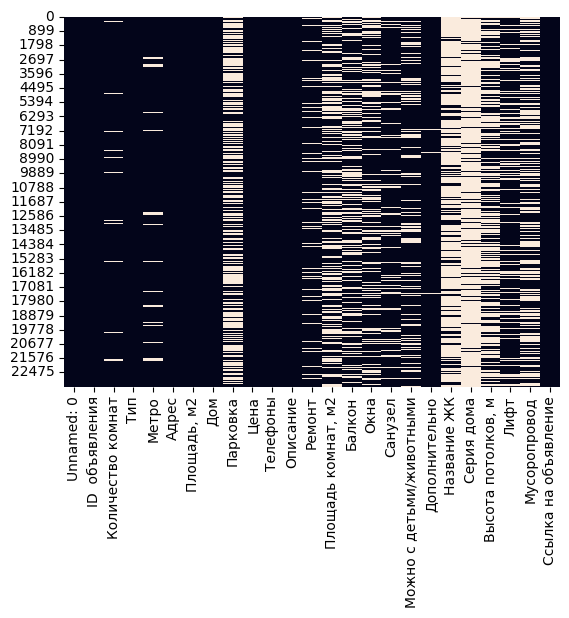

In [4]:
missing_values = data.isnull().sum()
print(missing_values)

sns.heatmap(data.isnull(), cbar=False)
plt.show()

## Дополнительно, примеры значений для последних 7 переменных (блок Насти :)


In [5]:
def show_unique_values(data, column_name):
    unique_values = data[column_name].unique()
    print(f"Unique values for '{column_name}':", unique_values)

#  for 'Санузел'
show_unique_values(data, 'Санузел')


Unique values for 'Санузел': [nan 'Совмещенный (2), Раздельный (1)' 'Совмещенный (3)' 'Совмещенный (2)'
 'Совмещенный (1), Раздельный (1)' 'Совмещенный (1)'
 'Совмещенный (2), Раздельный (2)' 'Раздельный (2)' 'Раздельный (1)'
 'Раздельный (3)' 'Совмещенный (4)' 'Совмещенный (3), Раздельный (1)'
 'Раздельный (4)' 'Совмещенный (1), Раздельный (2)'
 'Совмещенный (2), Раздельный (4)' 'Совмещенный (1), Раздельный (3)'
 'Совмещенный (3), Раздельный (3)' 'Совмещенный (4), Раздельный (2)'
 'Совмещенный (2), Раздельный (3)' 'Совмещенный (4), Раздельный (1)'
 'Совмещенный (3), Раздельный (2)']


In [6]:
def show_unique_values(data, column_name):
    unique_values = data[column_name].unique()
    print(f"Unique values for '{column_name}':", unique_values)

#  for 'Можно с детьми/животными'
show_unique_values(data, 'Можно с детьми/животными')


Unique values for 'Можно с детьми/животными': ['Можно с детьми, Можно с животными' 'Можно с детьми' 'Можно с животными'
 nan]


In [7]:
# def show_unique_values(data, column_name):
#     unique_values = data[column_name].unique()
#     print(f"Unique values for '{column_name}':", unique_values)

# #  for 'Дополнительно'
# show_unique_values(data, 'Дополнительно')

# # 🚧change to see count 

print(f"Unique values for 'Дополнительно':\n", data['Дополнительно'].head(15))
# data['Дополнительно'].head(15)


Unique values for 'Дополнительно':
 0     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
1     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
2     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
3     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
4     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
5     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
6     Мебель в комнатах, Мебель на кухне, Ванна, Сти...
7     Мебель в комнатах, Мебель на кухне, Ванна, Душ...
8     Мебель на кухне, Ванна, Стиральная машина, Кон...
9     Мебель в комнатах, Мебель на кухне, Ванна, Сти...
10    Мебель в комнатах, Мебель на кухне, Ванна, Душ...
11    Мебель в комнатах, Мебель на кухне, Душевая ка...
12    Мебель в комнатах, Мебель на кухне, Ванна, Душ...
13    Мебель в комнатах, Мебель на кухне, Ванна, Душ...
14    Мебель в комнатах, Мебель на кухне, Стиральная...
Name: Дополнительно, dtype: object


In [8]:
def show_unique_values(data, column_name):
    unique_values = data[column_name].dropna().unique()  # Remove NaN values before sorting
    sorted_values = sorted(unique_values, reverse=True)
    print(f"Unique values for '{column_name}' in descending order:", sorted_values)

# Example usage for 'Высота потолков, м'
show_unique_values(data, 'Высота потолков, м')

Unique values for 'Высота потолков, м' in descending order: [np.float64(320.0), np.float64(310.0), np.float64(280.0), np.float64(265.0), np.float64(264.0), np.float64(260.0), np.float64(28.0), np.float64(27.0), np.float64(26.0), np.float64(25.0), np.float64(12.8), np.float64(9.0), np.float64(6.0), np.float64(5.8), np.float64(5.5), np.float64(5.1), np.float64(5.0), np.float64(4.7), np.float64(4.6), np.float64(4.5), np.float64(4.2), np.float64(4.15), np.float64(4.1), np.float64(4.05), np.float64(4.0), np.float64(3.92), np.float64(3.9), np.float64(3.8), np.float64(3.7), np.float64(3.6), np.float64(3.56), np.float64(3.55), np.float64(3.5), np.float64(3.41), np.float64(3.4), np.float64(3.35), np.float64(3.3), np.float64(3.25), np.float64(3.24), np.float64(3.21), np.float64(3.2), np.float64(3.15), np.float64(3.11), np.float64(3.1), np.float64(3.08), np.float64(3.07), np.float64(3.05), np.float64(3.02), np.float64(3.0), np.float64(2.99), np.float64(2.97), np.float64(2.95), np.float64(2.94), n

In [9]:
def show_unique_values(data, column_name):
    unique_values = data[column_name].dropna().unique()  # Remove NaN values before sorting
    sorted_values = sorted(unique_values, reverse=True)
    print(f"Unique values for '{column_name}' in descending order:", sorted_values)

# for 'Лифт'
show_unique_values(data, 'Лифт')

Unique values for 'Лифт' in descending order: ['Пасс (8), Груз (8)', 'Пасс (7)', 'Пасс (60)', 'Пасс (6)', 'Пасс (50)', 'Пасс (5), Груз (3)', 'Пасс (5), Груз (1)', 'Пасс (5)', 'Пасс (4), Груз (4)', 'Пасс (4), Груз (3)', 'Пасс (4), Груз (2)', 'Пасс (4), Груз (1)', 'Пасс (4)', 'Пасс (3), Груз (3)', 'Пасс (3), Груз (2)', 'Пасс (3), Груз (1)', 'Пасс (3)', 'Пасс (2), Груз (4)', 'Пасс (2), Груз (3)', 'Пасс (2), Груз (2)', 'Пасс (2), Груз (1)', 'Пасс (2)', 'Пасс (1), Груз (4)', 'Пасс (1), Груз (3)', 'Пасс (1), Груз (2)', 'Пасс (1), Груз (12)', 'Пасс (1), Груз (1)', 'Пасс (1)', 'Груз (8)', 'Груз (6)', 'Груз (4)', 'Груз (3)', 'Груз (2)', 'Груз (1)']


In [10]:
def show_unique_values(data, column_name):
    unique_values = data[column_name].dropna().unique()  # Remove NaN values before sorting
    sorted_values = sorted(unique_values, reverse=True)
    print(f"Unique values for '{column_name}' in descending order:", sorted_values)

# for 'Мусоропровод'
show_unique_values(data, 'Мусоропровод')

Unique values for 'Мусоропровод' in descending order: ['Нет', 'Да']
